## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('priv_data_clean.csv')
df.head()

,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,...,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Uninjured,Percent.Died,Airplane.Type,Event.Day,Event.Month,Event.Year
0,ID,United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,...,Unknown,2.0,2.0,100.000000,0.000000,100.0,Private,24,10,1948
1,CA,United States,Destroyed,Piper,Pa24-180,1.0,Reciprocating,Personal,4.0,0.0,...,Unknown,4.0,4.0,100.000000,0.000000,100.0,Private,19,7,1962
2,VA,United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,...,Instrumental Meteorological Conditions,3.0,3.0,100.000000,0.000000,100.0,Private,30,8,1974
3,CA,United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,...,Instrumental Meteorological Conditions,2.0,2.0,100.000000,0.000000,100.0,Private,19,6,1977
4,MA,United States,Substantial,Mcdonnel Douglas,Dc9,2.0,Turbo Fan,Unknown,0.0,0.0,...,Visual Meteorological Conditions,45.0,1.0,2.222222,97.777778,0.0,Private,17,9,1979


## Visualize KPIs

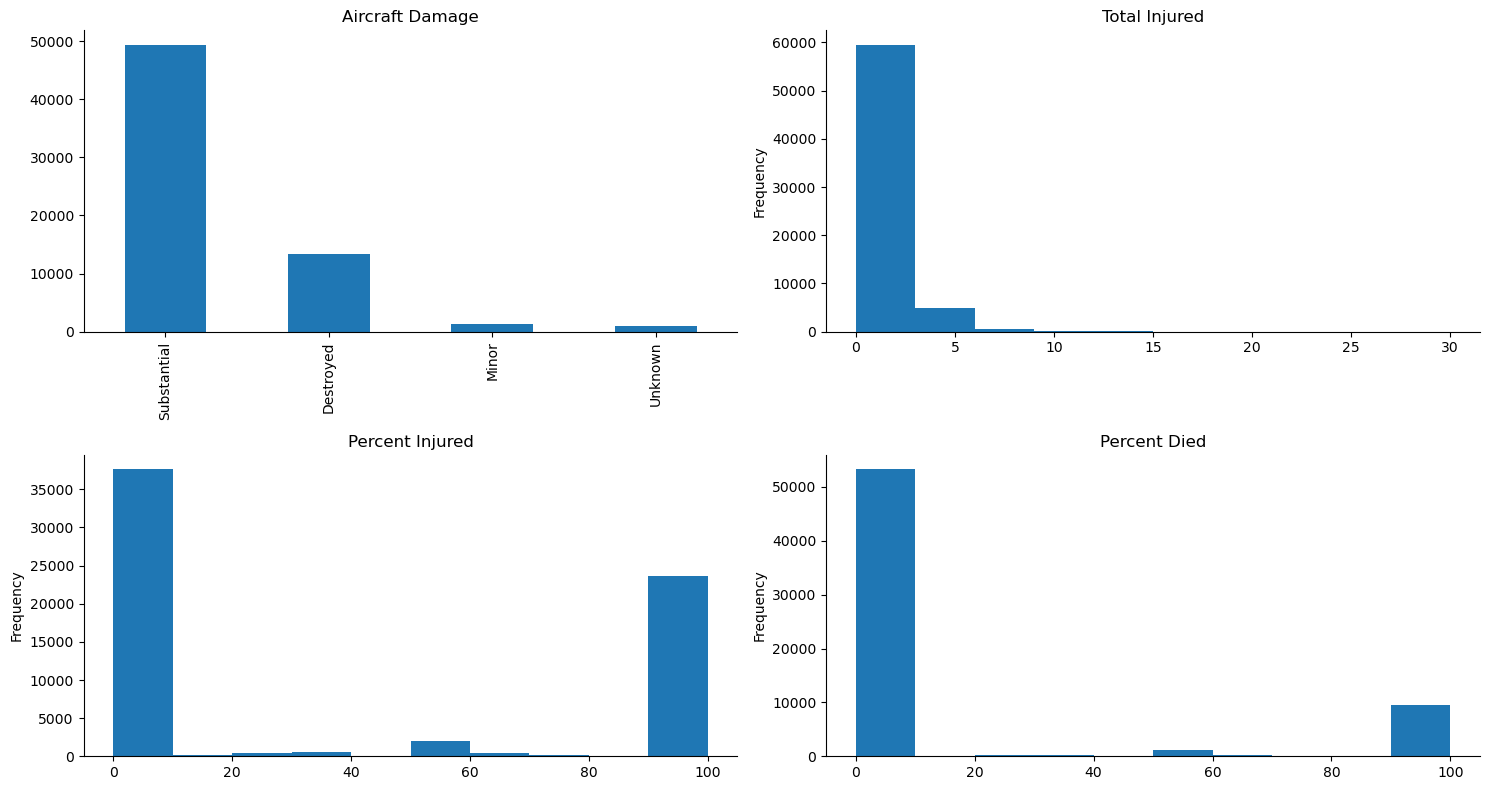

In [4]:
fig, ax = plt.subplots(2,2, figsize = ((15,8)))


df['Aircraft.damage'].value_counts().plot.bar(ax=ax[0,0]);
ax[0, 0].set_title("Aircraft Damage")
ax[0, 0].set_xlabel("")

df['Total.Injured'].plot.hist(ax=ax[0,1], range=[0,30])
ax[0, 1].set_title("Total Injured")
ax[0, 1].set_xlabel("")

df['Percent.Injured'].plot.hist(ax=ax[1,0])
ax[1, 0].set_title("Percent Injured")
ax[1, 0].set_xlabel("")

df['Percent.Died'].plot.hist(ax=ax[1,1]);
ax[1, 1].set_title("Percent Died")
ax[1, 1].set_xlabel("")

plt.tight_layout()
sns.despine()

In [5]:
popular_makes = df['Make'].value_counts()
popular_makes = list(popular_makes[popular_makes > 100].index)

print(f"top makes: {popular_makes}")

top makes: ['Cessna', 'Piper', 'Beech', 'Bell', 'Mooney', 'Grumman', 'Bellanca', 'Robinson', 'Hughes', 'Air Tractor', 'Boeing', 'Aeronca', 'Schweizer', 'Maule', 'Champion', 'Mcdonnel Douglas', 'Stinson', 'Luscombe', 'Aero Commander', 'De Havilland', 'Taylorcraft', 'North American', 'Aerospatiale', 'Hiller', 'Rockwell', 'Cirrus Design Corp', 'Enstrom', 'Robinson Helicopter', 'Grumman American', 'Ayres', 'Eurocopter', 'Robinson Helicopter Company', 'Sikorsky', 'Swearingen', 'Ercoupe Eng & Research Corp', 'Embraer', 'Lake', 'Waco', 'Fairchild', 'Aviat', 'Mitsubishi', 'GrummanSchweizer', 'Airbus', 'Socata', 'Ryan', 'Helio', 'Cirrus', 'Learjet']


## Damage Index

In [6]:
# Assign randomized values to unknown damaged indices based on percentage in dataset
unk_indices = list(df.loc[df['Aircraft.damage'] == 'Unknown'].index)

damage_probs = df['Aircraft.damage'].value_counts()
damage_probs = damage_probs.drop('Unknown')
damage_probs = damage_probs / damage_probs.sum()
rand_damage = np.random.choice(list(damage_probs.index), size = len(unk_indices), p = list(damage_probs))

adj_df = df.copy()
adj_df['Aircraft.damage'].iloc[unk_indices] = rand_damage

In [7]:
pop_means_df = adj_df.groupby('Make').mean(numeric_only=True)

di_df = pd.DataFrame(columns = ['Damage_Index', 'Num_Incidents', 'Uninjured_P', 'Injured_P', 'Died_P'], )

for make in popular_makes:
    make_info = adj_df[adj_df['Make'] == make]['Aircraft.damage'].value_counts(normalize=True)

    if 'Minor' not in make_info.index:
        make_info['Minor'] = 0

    #damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)
    damage_index = (make_info['Destroyed'] * 4) + (make_info['Substantial'] * 2) + (make_info['Minor'] * 1)
    
    num_incidents = adj_df['Make'].value_counts()[make]
    
    make_stats = list(pop_means_df.loc[make].reindex(['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']))
    
    di_df.loc[make] =[damage_index, num_incidents] + make_stats

In [8]:
threshold = 1000
penalty_rate = 0.5
di_df['Penalty'] = di_df['Num_Incidents'].apply(lambda x: 1 + penalty_rate * np.log(threshold/x) if x < threshold else 1)
di_df['Adj_Damage_Index'] = di_df['Damage_Index'] * di_df['Penalty'] 
di_df.sort_values(by = 'Adj_Damage_Index').head(10)

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P,Penalty,Adj_Damage_Index
Boeing,2.087161,849.0,62.468668,20.805772,6.407597,1.081848,2.257991
Cessna,2.358156,26092.0,64.264303,35.616887,14.190254,1.000000,2.358156
Robinson,2.366071,1008.0,57.630622,41.972553,18.715278,1.000000,2.366071
Piper,2.438815,14350.0,58.748910,41.167466,18.578451,1.000000,2.438815
Bellanca,2.442383,1024.0,55.102539,44.897461,18.953451,1.000000,2.442383
Bell,2.478477,2416.0,52.591073,46.995019,14.626752,1.000000,2.478477
Grumman,2.500871,1148.0,66.202872,33.797128,9.503444,1.000000,2.500871
Air Tractor,2.348028,862.0,59.416087,40.583913,14.365816,1.074250,2.522369
Mooney,2.532869,1293.0,48.337200,51.508121,26.029905,1.000000,2.532869
Hughes,2.387316,883.0,57.835032,42.051718,10.349188,1.062215,2.535843


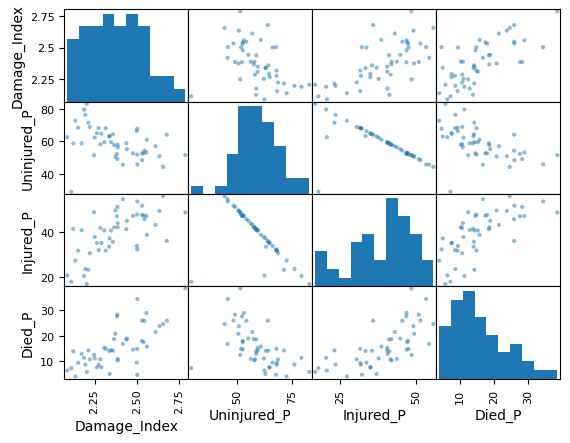

In [9]:
pd.plotting.scatter_matrix(di_df[['Damage_Index', 'Uninjured_P', 'Injured_P', 'Died_P']]);

## Damage Indices by State

In [10]:
# top5 = list(di_df.sort_values(by = 'Adj_Damage_Index')[:5].index)
# adj_df = adj_df[adj_df['Make'].isin(top5)].reset_index(drop = True)
# adj_df

In [11]:
loc_df = adj_df.groupby('Location').mean(numeric_only=True)

loc_di_df = pd.DataFrame(columns = ['Damage_Index', 'Num_Incidents', 'Uninjured_P', 'Injured_P', 'Died_P'], )

for location in loc_df.index:
    loc_info = adj_df[adj_df['Location'] == location]['Aircraft.damage'].value_counts(normalize=True)

    if 'Destroyed' not in loc_info.index:
        loc_info['Destroyed'] = 0
    
    if 'Substantial' not in loc_info.index:
        loc_info['Substantial'] = 0
    
    if 'Minor' not in loc_info.index:
        loc_info['Minor'] = 0

    damage_index = (loc_info['Destroyed'] * 4) + (loc_info['Substantial'] * 2) + (loc_info['Minor'] * 1)
    
    num_incidents = adj_df['Location'].value_counts()[location]
    
    loc_stats = list(loc_df.loc[location].reindex(['Percent.Uninjured', 'Percent.Injured', 'Percent.Died']))
    
    loc_di_df.loc[location] =[damage_index, num_incidents] + loc_stats

In [12]:
us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
             'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
             'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
             'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
             'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

loc_di_df = loc_di_df[loc_di_df.index.isin(us_states)]
loc_di_df = loc_di_df[loc_di_df.index.isin(us_states)]
loc_di_df.sort_values(by = 'Damage_Index')

,Damage_Index,Num_Incidents,Uninjured_P,Injured_P,Died_P
AK,2.170123,5208.0,75.567176,24.356019,9.107198
ND,2.252610,479.0,74.081103,25.918897,9.123173
IA,2.279935,618.0,62.772384,37.227616,13.781014
IL,2.326712,1460.0,68.242272,31.415263,12.249765
MO,2.334158,1212.0,64.088659,35.746325,14.345102
FL,2.334938,4362.0,62.221664,37.549083,14.299716
KS,2.342137,833.0,65.022866,34.737038,13.443377
MN,2.348817,1141.0,66.315024,33.597334,12.725679
OH,2.358253,1351.0,60.762920,39.015022,14.896458
NE,2.361630,589.0,64.400113,35.599887,15.673862


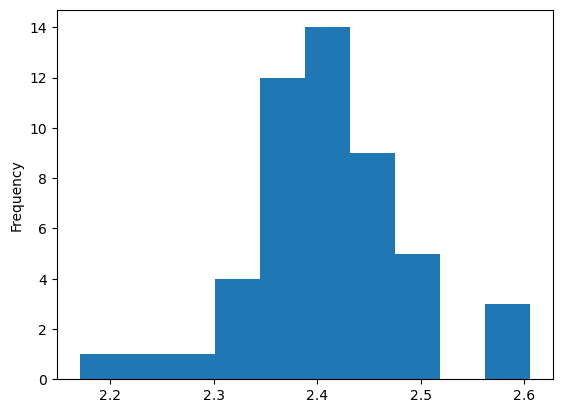

In [13]:
loc_di_df['Damage_Index'].plot.hist();